In [4]:
import pandas as pd
import numpy as np

#df=pd.read_csv('D:\SIH Project\Salary_Data.csv')
df=pd.read_excel('data2.0.xlsx')


In [5]:
time_map = {
    'More than 6 months, Hours to be determined':1,
       '3 to 6 months, Less than 30 hrs/week':2,
       'More than 6 months, 30+ hrs/week':3,
       '1 to 3 months, Less than 30 hrs/week':4,
       'Less than 1 month, Less than 30 hrs/week':5,
       'Less than 6 months,Hours to be determined':6,
       'Less than 2 months,hours to be determined':7,
       'More than 6 months, Less than 30 hrs/week':8,
       'Less than 1 month, Hours to be determined':9,
       'Less than 1 month, not_sure':10,
       '3 to 6 months, Hours to be determined':11,
       '1 to 4 months,less than 30hr/week':12, 
       '3 to 6 months, 30+ hrs/week':13,
       'More than 5 months,30+hrs/week':14, 
       'More than 6 months, not_sure':15
}

df['Time_Limilation_Code'] = df['Time_Limitation'].map(time_map)
print(df)




df.head()

                               Time_Limitation    Rating  Time_Limilation_Code
0   More than 6 months, Hours to be determined  4.987000                     1
1   More than 6 months, Hours to be determined  5.000000                     1
2         3 to 6 months, Less than 30 hrs/week  5.000000                     2
3         3 to 6 months, Less than 30 hrs/week  4.935536                     2
4             More than 6 months, 30+ hrs/week  4.942242                     3
..                                         ...       ...                   ...
73    Less than 1 month, Less than 30 hrs/week  5.000000                     5
74   More than 6 months, Less than 30 hrs/week  5.000000                     8
75       3 to 6 months, Hours to be determined  4.345500                    11
76                More than 6 months, not_sure  5.000000                    15
77    Less than 1 month, Less than 30 hrs/week  5.000000                     5

[78 rows x 3 columns]


,Time_Limitation,Rating,Time_Limilation_Code
0,"More than 6 months, Hours to be determined",4.987000,1
1,"More than 6 months, Hours to be determined",5.000000,1
2,"3 to 6 months, Less than 30 hrs/week",5.000000,2
3,"3 to 6 months, Less than 30 hrs/week",4.935536,2
4,"More than 6 months, 30+ hrs/week",4.942242,3


In [6]:
df['Time_Limitation'].unique()

array(['More than 6 months, Hours to be determined',
       '3 to 6 months, Less than 30 hrs/week',
       'More than 6 months, 30+ hrs/week',
       '1 to 3 months, Less than 30 hrs/week',
       'Less than 1 month, Less than 30 hrs/week',
       'Less than 6 months,Hours to be determined',
       'Less than 2 months,hours to be determined',
       'More than 6 months, Less than 30 hrs/week',
       'Less than 1 month, Hours to be determined',
       'Less than 1 month, not_sure',
       '3 to 6 months, Hours to be determined',
       '1 to 4 months,less than 30hr/week', '3 to 6 months, 30+ hrs/week',
       'More than 5 months,30+hrs/week', 'More than 6 months, not_sure'],
      dtype=object)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Time_Limitation       78 non-null     object 
 1   Rating                78 non-null     float64
 2   Time_Limilation_Code  78 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 2.0+ KB


In [8]:
df.shape

(78, 3)

In [9]:
df.size

234

In [10]:
df.columns


Index(['Time_Limitation', 'Rating', 'Time_Limilation_Code'], dtype='object')

(3.0, 6.0)

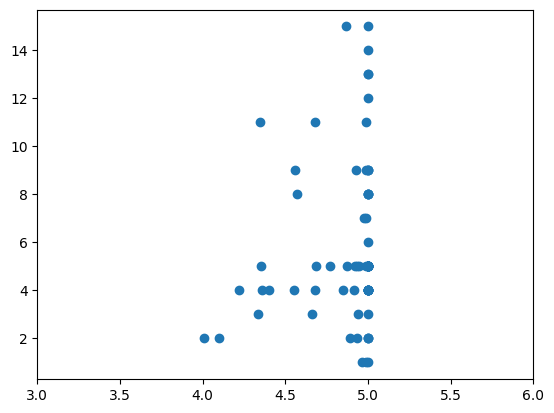

In [11]:
import matplotlib.pyplot as plt
plt.scatter(df['Rating'],df['Time_Limilation_Code'])
plt.xlim(3,6)

In [12]:
df['Time_Limitation'].isnull().sum()

np.int64(0)

In [13]:

df['Rating'].isnull().sum()

np.int64(0)

In [14]:

df=df.drop(['Time_Limitation'],axis=1)
x=df.drop(['Rating'],axis=1)
y=df['Rating']
df.dtypes

Rating                  float64
Time_Limilation_Code      int64
dtype: object

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=42)

In [17]:
ytrain.shape

(58,)

In [18]:
pd.Series
xtrain.values.reshape(-1,1)


xtrain.shape

(58, 1)

In [19]:
from sklearn.linear_model import LinearRegression 
LR=LinearRegression()
LR.fit(xtrain,ytrain)


LinearRegression()

In [20]:

pred=LR.predict(xtest)
pred
ytest

33    4.008000
0     4.987000
34    4.556000
12    4.919550
10    5.000000
77    5.000000
30    5.000000
4     4.942242
49    4.769900
66    5.000000
61    4.915348
22    5.000000
72    4.988636
54    5.000000
18    5.000000
44    5.000000
31    5.000000
58    4.550000
9     4.688143
5     5.000000
Name: Rating, dtype: float64

In [21]:
r=float(input('Enter your rating: '))
ar=np.array(r).reshape(1,-1)
ans=LR.predict(ar)

print(int(ans))
print("Done!!")

5429
Done!!


/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/tmp/ipykernel_7094/1703424113.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(int(ans))
